In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 10

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 1180 (4.61 KB)
Trainable params: 1180 (4.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
29/31 [===========================>..] - ETA: 0s - loss: 2.2872 - accuracy: 0.2376 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 1s 10ms/step - loss: 2.2786 - accuracy: 0.2424 - val_loss: 2.1241 - val_accuracy: 0.2759
Epoch 2/1000
 1/31 [..............................] - ETA: 0s - loss: 2.1844 - accuracy: 0.2656
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 2.1113 - accuracy: 0.2843 - val_loss: 1.9903 - val_accuracy: 0.3247
Epoch 3/1000
30/31 [============================>.] - ETA: 0s - loss: 2.0183 - accuracy: 0.3198

D:\hand-gesture-recognition-mediapipe-main\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 2.0145 - accuracy: 0.3227 - val_loss: 1.8709 - val_accuracy: 0.3613
Epoch 4/1000
30/31 [============================>.] - ETA: 0s - loss: 1.9302 - accuracy: 0.3492
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 1.9286 - accuracy: 0.3498 - val_loss: 1.7783 - val_accuracy: 0.4367
Epoch 5/1000
 1/31 [..............................] - ETA: 0s - loss: 1.9340 - accuracy: 0.3594
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 1.8765 - accuracy: 0.3717 - val_loss: 1.7158 - val_accuracy: 0.4771
Epoch 6/1000
30/31 [============================>.] - ETA: 0s - loss: 1.8172 - accuracy: 0.3810
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [=============

31/31 [==============================] - 0s 4ms/step - loss: 1.1985 - accuracy: 0.5351 - val_loss: 0.8066 - val_accuracy: 0.7744
Epoch 31/1000
 1/31 [..............................] - ETA: 0s - loss: 1.1858 - accuracy: 0.5703
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 1.1937 - accuracy: 0.5546 - val_loss: 0.7859 - val_accuracy: 0.7988
Epoch 32/1000
 1/31 [..............................] - ETA: 0s - loss: 1.2736 - accuracy: 0.5234
Epoch 32: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 1.1920 - accuracy: 0.5516 - val_loss: 0.7751 - val_accuracy: 0.8247
Epoch 33/1000
31/31 [==============================] - ETA: 0s - loss: 1.1619 - accuracy: 0.5602
Epoch 33: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 1.1619 - accuracy: 0.5602 - va

Epoch 58/1000
 1/31 [..............................] - ETA: 0s - loss: 0.9061 - accuracy: 0.6484
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 1.0399 - accuracy: 0.5874 - val_loss: 0.5888 - val_accuracy: 0.8598
Epoch 59/1000
 1/31 [..............................] - ETA: 0s - loss: 0.9513 - accuracy: 0.6094
Epoch 59: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 1.0091 - accuracy: 0.6087 - val_loss: 0.5711 - val_accuracy: 0.8537
Epoch 60/1000
31/31 [==============================] - ETA: 0s - loss: 1.0149 - accuracy: 0.6087
Epoch 60: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 1.0149 - accuracy: 0.6087 - val_loss: 0.5668 - val_accuracy: 0.8643
Epoch 61/1000
 1/31 [..............................] - ETA: 0s - loss: 1.0885 - accuracy: 0

 1/31 [..............................] - ETA: 0s - loss: 0.8597 - accuracy: 0.6562
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 0.9684 - accuracy: 0.6110 - val_loss: 0.5098 - val_accuracy: 0.8758
Epoch 86/1000
 1/31 [..............................] - ETA: 0s - loss: 0.9705 - accuracy: 0.6172
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 0.9667 - accuracy: 0.6209 - val_loss: 0.5144 - val_accuracy: 0.8636
Epoch 87/1000
 1/31 [..............................] - ETA: 0s - loss: 0.9666 - accuracy: 0.5703
Epoch 87: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 0.9598 - accuracy: 0.6298 - val_loss: 0.5120 - val_accuracy: 0.8697
Epoch 88/1000
 1/31 [..............................] - ETA: 0s - loss: 0.8746 - accuracy: 0.6172
Epoch 88

 1/31 [..............................] - ETA: 0s - loss: 0.9044 - accuracy: 0.6406
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 0.9263 - accuracy: 0.6380 - val_loss: 0.4738 - val_accuracy: 0.8811
Epoch 113/1000
 1/31 [..............................] - ETA: 0s - loss: 0.9807 - accuracy: 0.6406
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 0.9486 - accuracy: 0.6374 - val_loss: 0.4806 - val_accuracy: 0.8918
Epoch 114/1000
 1/31 [..............................] - ETA: 0s - loss: 0.9283 - accuracy: 0.5625
Epoch 114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 0.9272 - accuracy: 0.6385 - val_loss: 0.4841 - val_accuracy: 0.8811
Epoch 115/1000
 1/31 [..............................] - ETA: 0s - loss: 0.8927 - accuracy: 0.6094
Ep

Epoch 139/1000
30/31 [============================>.] - ETA: 0s - loss: 0.9083 - accuracy: 0.6458
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.9078 - accuracy: 0.6468 - val_loss: 0.4570 - val_accuracy: 0.8971
Epoch 140/1000
26/31 [========================>.....] - ETA: 0s - loss: 0.9161 - accuracy: 0.6442
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.9158 - accuracy: 0.6413 - val_loss: 0.4575 - val_accuracy: 0.8902
Epoch 141/1000
27/31 [=========================>....] - ETA: 0s - loss: 0.9237 - accuracy: 0.6418
Epoch 141: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.9189 - accuracy: 0.6430 - val_loss: 0.4566 - val_accuracy: 0.8902
Epoch 142/1000
25/31 [=======================>......] - ETA: 0s - loss: 0.8893 - accu

Epoch 166/1000
30/31 [============================>.] - ETA: 0s - loss: 0.8610 - accuracy: 0.6667
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.8622 - accuracy: 0.6662 - val_loss: 0.4268 - val_accuracy: 0.8963
Epoch 167/1000
 1/31 [..............................] - ETA: 0s - loss: 0.9449 - accuracy: 0.5781
Epoch 167: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 0.8706 - accuracy: 0.6641 - val_loss: 0.4166 - val_accuracy: 0.9024
Epoch 168/1000
29/31 [===========================>..] - ETA: 0s - loss: 0.8606 - accuracy: 0.6654
Epoch 168: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.8646 - accuracy: 0.6608 - val_loss: 0.4250 - val_accuracy: 0.8933
Epoch 169/1000
28/31 [==========================>...] - ETA: 0s - loss: 0.8845 - accu

Epoch 193/1000
31/31 [==============================] - ETA: 0s - loss: 0.8935 - accuracy: 0.6529
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 0.8935 - accuracy: 0.6529 - val_loss: 0.4196 - val_accuracy: 0.9040
Epoch 194/1000
 1/31 [..............................] - ETA: 0s - loss: 0.7681 - accuracy: 0.6953
Epoch 194: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 0.8648 - accuracy: 0.6608 - val_loss: 0.4083 - val_accuracy: 0.9009
Epoch 195/1000
 1/31 [..............................] - ETA: 0s - loss: 0.8014 - accuracy: 0.7031
Epoch 195: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 0.8782 - accuracy: 0.6603 - val_loss: 0.4077 - val_accuracy: 0.9078
Epoch 196/1000
 1/31 [..............................] - ETA: 0s - loss: 0.8644 - accu

Epoch 220/1000
29/31 [===========================>..] - ETA: 0s - loss: 0.8722 - accuracy: 0.6611
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.8713 - accuracy: 0.6626 - val_loss: 0.4043 - val_accuracy: 0.8963
Epoch 221/1000
29/31 [===========================>..] - ETA: 0s - loss: 0.8440 - accuracy: 0.6676
Epoch 221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.8394 - accuracy: 0.6702 - val_loss: 0.4037 - val_accuracy: 0.9062
Epoch 222/1000
29/31 [===========================>..] - ETA: 0s - loss: 0.8543 - accuracy: 0.6622
Epoch 222: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.8502 - accuracy: 0.6641 - val_loss: 0.4025 - val_accuracy: 0.9024
Epoch 223/1000
 1/31 [..............................] - ETA: 0s - loss: 0.8374 - accu

Epoch 247/1000
31/31 [==============================] - ETA: 0s - loss: 0.8342 - accuracy: 0.6684
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 0.8342 - accuracy: 0.6684 - val_loss: 0.3899 - val_accuracy: 0.9055
Epoch 248/1000
31/31 [==============================] - ETA: 0s - loss: 0.8264 - accuracy: 0.6773
Epoch 248: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.8264 - accuracy: 0.6773 - val_loss: 0.3805 - val_accuracy: 0.9108
Epoch 249/1000
30/31 [============================>.] - ETA: 0s - loss: 0.8438 - accuracy: 0.6779
Epoch 249: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.8438 - accuracy: 0.6786 - val_loss: 0.3855 - val_accuracy: 0.9040
Epoch 250/1000
30/31 [============================>.] - ETA: 0s - loss: 0.8223 - accu

Epoch 274/1000
26/31 [========================>.....] - ETA: 0s - loss: 0.8633 - accuracy: 0.6665
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.8626 - accuracy: 0.6664 - val_loss: 0.3821 - val_accuracy: 0.9085
Epoch 275/1000
31/31 [==============================] - ETA: 0s - loss: 0.8127 - accuracy: 0.6845
Epoch 275: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.8127 - accuracy: 0.6845 - val_loss: 0.3789 - val_accuracy: 0.9085
Epoch 276/1000
22/31 [====================>.........] - ETA: 0s - loss: 0.8384 - accuracy: 0.6740
Epoch 276: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.8302 - accuracy: 0.6778 - val_loss: 0.3853 - val_accuracy: 0.9093
Epoch 277/1000
26/31 [========================>.....] - ETA: 0s - loss: 0.8483 - accu

Epoch 301/1000
28/31 [==========================>...] - ETA: 0s - loss: 0.8454 - accuracy: 0.6724
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.8429 - accuracy: 0.6702 - val_loss: 0.3717 - val_accuracy: 0.9253
Epoch 302/1000
30/31 [============================>.] - ETA: 0s - loss: 0.8252 - accuracy: 0.6846
Epoch 302: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.8243 - accuracy: 0.6860 - val_loss: 0.3738 - val_accuracy: 0.9139
Epoch 303/1000
30/31 [============================>.] - ETA: 0s - loss: 0.8373 - accuracy: 0.6669
Epoch 303: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.8343 - accuracy: 0.6684 - val_loss: 0.3671 - val_accuracy: 0.9093
Epoch 304/1000
27/31 [=========================>....] - ETA: 0s - loss: 0.8255 - accu

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 0.9223


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 76ms/step
[9.5827597e-01 2.2652946e-02 7.2118180e-04 7.2373307e-18 4.5951183e-05
 1.8302497e-02 8.7204610e-12 8.6948886e-11 1.0216195e-06 4.4806913e-07]
0


# Confusion matrix

41/41 [==============================] - 0s 1ms/step


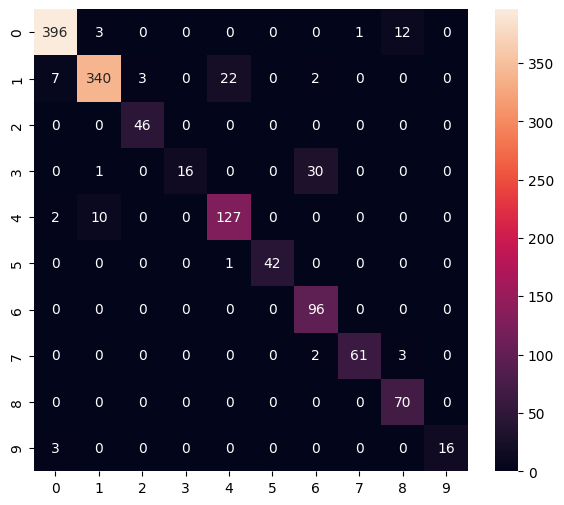

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       412
           1       0.96      0.91      0.93       374
           2       0.94      1.00      0.97        46
           3       1.00      0.34      0.51        47
           4       0.85      0.91      0.88       139
           5       1.00      0.98      0.99        43
           6       0.74      1.00      0.85        96
           7       0.98      0.92      0.95        66
           8       0.82      1.00      0.90        70
           9       1.00      0.84      0.91        19

    accuracy                           0.92      1312
   macro avg       0.93      0.89      0.89      1312
weighted avg       0.93      0.92      0.92      1312



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

D:\hand-gesture-recognition-mediapipe-main\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\thush\AppData\Local\Temp\tmp89sxfyxn\assets


INFO:tensorflow:Assets written to: C:\Users\thush\AppData\Local\Temp\tmp89sxfyxn\assets


6820

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 9.88 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.5827597e-01 2.2652939e-02 7.2118215e-04 7.2373307e-18 4.5951223e-05
 1.8302530e-02 8.7204280e-12 8.6948553e-11 1.0216183e-06 4.4806870e-07]
0
